In [6]:
# open wordnet_to_labels_txt file

with open('imagenet1000_clsidx_to_labels.txt','r') as f:
    wordnet_to_labels_dict = eval(f.read())

In [7]:
# open csv folder
import csv

CSV_FOLDER = "../result"

# real_label
with open(f"{CSV_FOLDER}/real_label.csv") as f:
    real_label_dict = {}
    reader = csv.reader(f)
    for row in reader:
        key = row[0]
        value = row[1:]
#         if value[0] == "9999":
#             continue
        real_label_dict[key] = value

# gmlp
with open(f"{CSV_FOLDER}/gmlp.csv") as f:
    gmlp_predict_label_dict = {}
    reader = csv.reader(f)
    for row in reader:
        key = row[0]
        value = row[1:]
        gmlp_predict_label_dict[key] = value

# efficent
with open(f"{CSV_FOLDER}/efficientnet_b3.csv") as f:
    efficientnet_predict_label_dict = {}
    reader = csv.reader(f)
    for row in reader:
        key = row[0]
        value = row[1:]
        efficientnet_predict_label_dict[key] = value


In [9]:
print(real_label_dict["ILSVRC2012_val_00000002.JPEG"])
print(gmlp_predict_label_dict["ILSVRC2012_val_00000002.JPEG"])
print(efficientnet_predict_label_dict["ILSVRC2012_val_00000002.JPEG"])

['970', '795']
['795', '970', '872', '796', '979']
['795', '970', '796', '979', '672']


In [4]:
# 英語のラベルを日本語に変換する
def translation_en_to_ja(text):
    from googletrans import Translator
    tr = Translator()
    return tr.translate(text=text, src="en", dest="ja").text 

In [5]:
translation_en_to_ja("cat")

'ネコ'

In [11]:
# gmlpがtop-5で正しく予測したもののリストを取得する

gmlp_predict_correct_list = []
gmlp_predict_incorrect_list = []
for i in range(1,50001):
    image_file_name = f"ILSVRC2012_val_{str(i).zfill(8)}.JPEG"
    if int(real_label_dict[image_file_name][0]) == 9999:
        continue
    gmlp_predict_top5_set = set(gmlp_predict_label_dict[image_file_name])
    real_labels_set = set(real_label_dict[image_file_name])
    gmlp_predict_top5_and_real_labels = list(gmlp_predict_top5_set & real_labels_set)
    
    if len(gmlp_predict_top5_and_real_labels) > 0:
        gmlp_predict_correct_list.append(i)
    else:
        gmlp_predict_incorrect_list.append(i)
    

In [16]:
len(gmlp_predict_incorrect_list)

1589

In [17]:
# 同様にefficientnetがtop-5で正しく予測したもののリストを取得する

efficientnet_predict_correct_list = []
efficientnet_predict_incorrect_list = []
for i in range(1,50001):
    image_file_name = f"ILSVRC2012_val_{str(i).zfill(8)}.JPEG"
    if int(real_label_dict[image_file_name][0]) == 9999:
        continue
    efficientnet_predict_top5_set = set(efficientnet_predict_label_dict[image_file_name])
    real_labels_set = set(real_label_dict[image_file_name])
    efficientnet_predict_top5_and_real_labels = list(efficientnet_predict_top5_set & real_labels_set)
    
    if len(efficientnet_predict_top5_and_real_labels) > 0:
        efficientnet_predict_correct_list.append(i)
    else:
        efficientnet_predict_incorrect_list.append(i)
    

In [19]:
len(efficientnet_predict_incorrect_list)

1215

In [20]:
# gmlpが正解でefficientnetが不正解のリストを取得する
gmlp_predict_correct_set = set(gmlp_predict_correct_list)
efficient_predict_incorrect_set = set(efficientnet_predict_incorrect_list)
gmlp_correct_but_efficient_incorrect_list = list(gmlp_predict_correct_set & efficient_predict_incorrect_set)
gmlp_correct_but_efficient_incorrect_list.sort()

In [21]:
print(len(gmlp_correct_but_efficient_incorrect_list))
print(type(gmlp_correct_but_efficient_incorrect_list))
print(gmlp_correct_but_efficient_incorrect_list)

446
<class 'list'>
[6, 128, 232, 239, 277, 301, 313, 387, 441, 776, 821, 1080, 1108, 1109, 1315, 1358, 1424, 1466, 1467, 1482, 1515, 1534, 1631, 1871, 1875, 1890, 1964, 2169, 2205, 2351, 2610, 2722, 2739, 2768, 2807, 2909, 2928, 2976, 2990, 3041, 3148, 3181, 3322, 3360, 3565, 3765, 3773, 3890, 3911, 4195, 4273, 4345, 4457, 4654, 4680, 4785, 5123, 5148, 5215, 5468, 5488, 5495, 5503, 6022, 6088, 6248, 6270, 6319, 6418, 6485, 6530, 6588, 6766, 6770, 6806, 6971, 6993, 7369, 7409, 7413, 7676, 7717, 7733, 7910, 7934, 8115, 8261, 8461, 8548, 8746, 8954, 9143, 9150, 9155, 9202, 9231, 9360, 9402, 9441, 9504, 9575, 9581, 9593, 9607, 9619, 9669, 9692, 9792, 9983, 10044, 10089, 10342, 10598, 10602, 10612, 10771, 11051, 11130, 11156, 11442, 11525, 11581, 11611, 11619, 11687, 11807, 12120, 12202, 12591, 12769, 12943, 13032, 13335, 13374, 13431, 13433, 13439, 13776, 13996, 14252, 14412, 14575, 14689, 14832, 14916, 15393, 15404, 15476, 15712, 15831, 15860, 15910, 16008, 16285, 16447, 16634, 16686, 170

In [22]:
# gmlpが不正解でefficientnetが正解のリストを取得する
gmlp_predict_incorrect_set = set(gmlp_predict_incorrect_list)
efficient_predict_correct_set = set(efficientnet_predict_correct_list)
gmlp_incorrect_but_efficient_correct_list = list(gmlp_predict_incorrect_set & efficient_predict_correct_set)
gmlp_incorrect_but_efficient_correct_list.sort()

In [23]:
print(len(gmlp_incorrect_but_efficient_correct_list))
print(type(gmlp_incorrect_but_efficient_correct_list))
print(gmlp_incorrect_but_efficient_correct_list)

820
<class 'list'>
[136, 192, 214, 244, 360, 413, 419, 588, 589, 614, 627, 656, 704, 707, 745, 808, 851, 870, 987, 1079, 1127, 1320, 1420, 1446, 1471, 1559, 1587, 1621, 1650, 1685, 2054, 2075, 2092, 2482, 2527, 2542, 2556, 2648, 2821, 2918, 2926, 2979, 3014, 3075, 3089, 3093, 3129, 3192, 3203, 3244, 3256, 3270, 3355, 3374, 3568, 3601, 3608, 3695, 3806, 3817, 3868, 3962, 3969, 4124, 4182, 4233, 4252, 4290, 4411, 4499, 4501, 4509, 4681, 4695, 4704, 4753, 4787, 4827, 4838, 4937, 5042, 5414, 5485, 5491, 5555, 5645, 5666, 5683, 5706, 5764, 5766, 5943, 6186, 6198, 6211, 6224, 6258, 6327, 6500, 6790, 6808, 6923, 6949, 6962, 7089, 7091, 7118, 7145, 7448, 7485, 7502, 7656, 7662, 7806, 7919, 8045, 8055, 8183, 8194, 8252, 8278, 8470, 8492, 8561, 8569, 8589, 8605, 8649, 8666, 8797, 8823, 8864, 8874, 8878, 8895, 8950, 9028, 9066, 9086, 9223, 9356, 9359, 9367, 9426, 9879, 9959, 9961, 10108, 10115, 10122, 10123, 10234, 10256, 10380, 10750, 10857, 10935, 10967, 10982, 11036, 11118, 11119, 11132, 11158

In [24]:
j = 0
gmlp_correct_but_efficient_incorrect_num = len(gmlp_correct_but_efficient_incorrect_list)

---------------------------------------------------------------
ILSVRC2012_val_00001875.JPEG
real label:['515']
gmlp(correct):hatchet(ハチェット)
gmlp_top5_label:['596', '499', '758', '515', '792']
efficientnet(incorrect):shovel(シャベル)
efficientent_top5_label:['792', '813', '557', '596', '499']


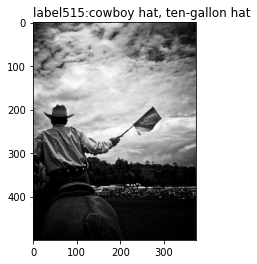

In [120]:
# gmlpが正解でefficientnetが不正解のリストから画像を確認する
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if j < gmlp_correct_but_efficient_incorrect_num:
    image_num = gmlp_correct_but_efficient_incorrect_list[j]
    print("---------------------------------------------------------------")
    image_file_name = f"ILSVRC2012_val_{str(image_num).zfill(8)}.JPEG"
    real_label = real_label_dict[image_file_name]
    print(f"{image_file_name}")
    print(f"real label:{real_label}")
    
    gmlp_predict_label_name = wordnet_to_labels_dict[int(gmlp_predict_label_dict[image_file_name][0])]
    gmlp_predict_label_ja = translation_en_to_ja(gmlp_predict_label_name)
    print(f"gmlp(correct):{gmlp_predict_label_name}({gmlp_predict_label_ja})")
    print(f"gmlp_top5_label:{gmlp_predict_label_dict[image_file_name]}")
    
    efficientnet_predict_label_name = wordnet_to_labels_dict[int(efficientnet_predict_label_dict[image_file_name][0])]
    efficientnet_predict_label_ja = translation_en_to_ja(efficientnet_predict_label_name)
    print(f"efficientnet(incorrect):{efficientnet_predict_label_name}({efficientnet_predict_label_ja})")
    print(f"efficientent_top5_label:{efficientnet_predict_label_dict[image_file_name]}")
    
    plt.imshow(mpimg.imread(f"../imagenet/validation/{image_file_name}"),cmap="gray")
    plt.title(f"label{real_label[0]}:{wordnet_to_labels_dict[int(real_label[0])]}", loc='left', y=1)
    
    j += 1

In [122]:
k = 0
gmlp_incorrect_but_efficient_correct_num = len(gmlp_incorrect_but_efficient_correct_list)

---------------------------------------------------------------
ILSVRC2012_val_00006258.JPEG
real label:['468']
gmlp(incorrect):hamper(妨げる)
gmlp_top5_label:['588', '918', '790', '907', '808']
efficientnet(correct):cab, hack, taxi, taxicab(タクシー、ハック、タクシー、タクシー)
efficientent_top5_label:['468', '779', '415', '799', '582']


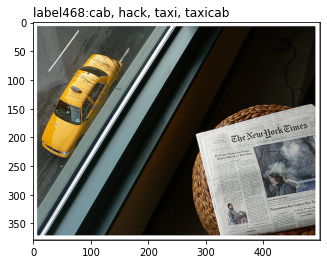

In [231]:
# gmlpが不正解でefficientnetが正解のリストから画像を確認する
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if k < gmlp_incorrect_but_efficient_correct_num:
    image_num = gmlp_incorrect_but_efficient_correct_list[k]
    image_file_name = f"ILSVRC2012_val_{str(image_num).zfill(8)}.JPEG"
    real_label = real_label_dict[image_file_name]
    print("---------------------------------------------------------------")
    print(f"{image_file_name}")
    print(f"real label:{real_label}")
    gmlp_predict_label_name = wordnet_to_labels_dict[int(gmlp_predict_label_dict[image_file_name][0])]
    gmlp_predict_label_ja = translation_en_to_ja(gmlp_predict_label_name)
    print(f"gmlp(incorrect):{gmlp_predict_label_name}({gmlp_predict_label_ja})")
    print(f"gmlp_top5_label:{gmlp_predict_label_dict[image_file_name]}")
    efficientnet_predict_label_name = wordnet_to_labels_dict[int(efficientnet_predict_label_dict[image_file_name][0])]
    efficientnet_predict_label_ja = translation_en_to_ja(efficientnet_predict_label_name)
    print(f"efficientnet(correct):{efficientnet_predict_label_name}({efficientnet_predict_label_ja})")
    print(f"efficientent_top5_label:{efficientnet_predict_label_dict[image_file_name]}")
    
    plt.imshow(mpimg.imread(f"../imagenet/validation/{image_file_name}"),cmap="gray")
    plt.title(f"label{real_label[0]}:{wordnet_to_labels_dict[int(real_label[0])]}", loc='left', y=1)
    
    k += 1

In [232]:
list = ['588', '918', '790', '907', '808']
for l in list:
    num = int(l)
    label_name = wordnet_to_labels_dict[num]
    print(l)
    print(label_name)
    print(translation_en_to_ja(label_name))
    print("\n")

588
hamper
妨げる


918
crossword puzzle, crossword
クロスワードパズル、クロスワード


790
shopping basket
買い物カゴ


907
wine bottle
ワインボトル


808
sombrero
ソンブレロ


